# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
api_key= "&appid=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}{city}{api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | constantia
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | ayden
Processing Record 8 of Set 1 | homer
Processing Record 9 of Set 1 | marion
Processing Record 10 of Set 1 | kamyshin
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | changyon
Processing Record 14 of Set 1 | hammerfest
Processing Record 15 of Set 1 | bhimunipatnam
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | kone
Processing Record 19 of Set 1 | tanjung pandan
Processing Record 20 of Set 1 | san antonio de pale
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | georgetown
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,296.16,85,100,8.28,PN,1699931139
1,iqaluit,63.7506,-68.5145,255.20,64,0,2.57,CA,1699931139
2,avarua,-21.2078,-159.7750,297.18,60,20,4.12,CK,1699931243
3,constantia,44.1833,28.6500,277.53,58,54,4.04,RO,1699931045
4,port-aux-francais,-49.3500,70.2167,279.68,97,100,15.17,TF,1699931160


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,296.16,85,100,8.28,PN,1699931139
1,iqaluit,63.7506,-68.5145,255.20,64,0,2.57,CA,1699931139
2,avarua,-21.2078,-159.7750,297.18,60,20,4.12,CK,1699931243
3,constantia,44.1833,28.6500,277.53,58,54,4.04,RO,1699931045
4,port-aux-francais,-49.3500,70.2167,279.68,97,100,15.17,TF,1699931160


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

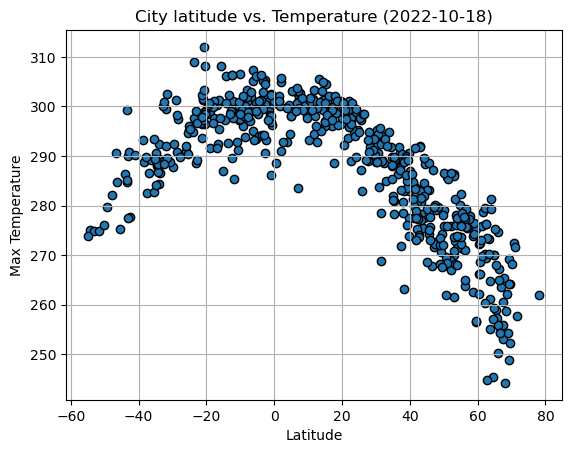

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis=city_data_df['Lat']
y_axis=city_data_df['Max Temp']
plt.scatter(x_axis,y_axis,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City latitude vs. Temperature (2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

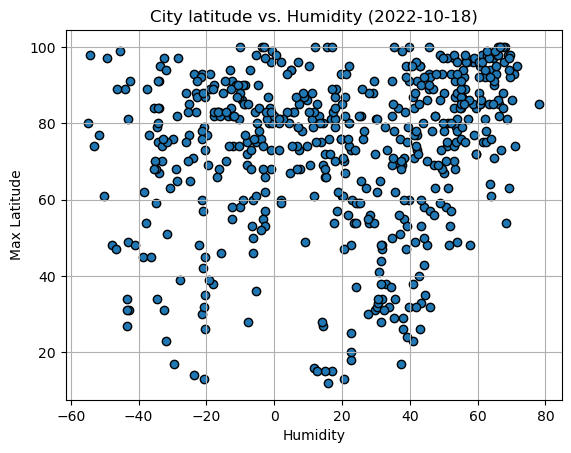

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis=city_data_df['Lat']
y_axis=city_data_df['Humidity']
plt.scatter(x_axis,y_axis,edgecolors='black')

# Incorporate the other graph properties
plt.ylabel('Max Latitude')
plt.xlabel('Humidity')
plt.title('City latitude vs. Humidity (2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

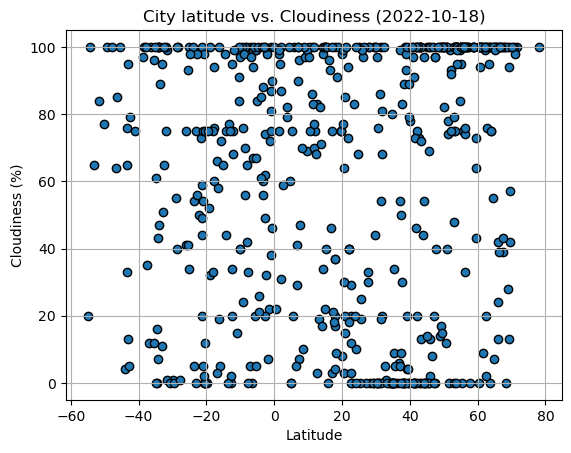

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis=city_data_df['Lat']
y_axis=city_data_df['Cloudiness']
plt.scatter(x_axis,y_axis,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City latitude vs. Cloudiness (2022-10-18)')
plt.grid()
plt

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

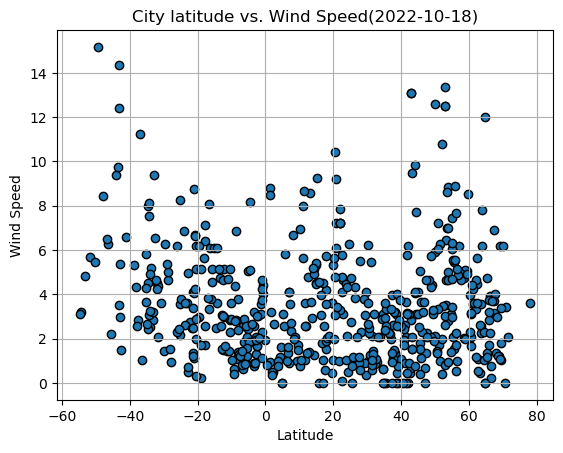

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis=city_data_df['Lat']
y_axis=city_data_df['Wind Speed']
plt.scatter(x_axis,y_axis,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City latitude vs. Wind Speed(2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def linear_function(x_values, y_values, titles, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values, edgecolors='black')

    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq,text_coordinates, fontsize=15, color='red')

    print(f'The r-squared is:{rvalue**2}')

    


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,255.20,64,0,2.57,CA,1699931139
3,constantia,44.1833,28.6500,277.53,58,54,4.04,RO,1699931045
5,utrik,11.2278,169.8474,301.24,81,100,7.99,MH,1699931244
6,ayden,35.4727,-77.4155,278.31,100,0,0.00,US,1699931244
7,homer,59.6425,-151.5483,275.24,84,43,8.54,US,1699930988


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,296.16,85,100,8.28,PN,1699931139
2,avarua,-21.2078,-159.7750,297.18,60,20,4.12,CK,1699931243
4,port-aux-francais,-49.3500,70.2167,279.68,97,100,15.17,TF,1699931160
10,edinburgh of the seven seas,-37.0676,-12.3116,286.61,77,12,11.23,SH,1699931144
15,blackmans bay,-43.0167,147.3167,290.11,49,13,5.39,AU,1699931167


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is:0.7848856800082912


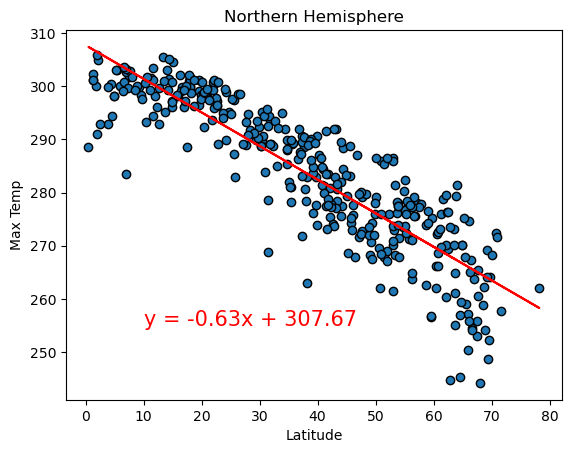

In [34]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Max Temp']

linear_function(x_values,y_values, 'Max Temp' , (10,255))



plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


plt.show()

The r-squared is:0.48863899684080925


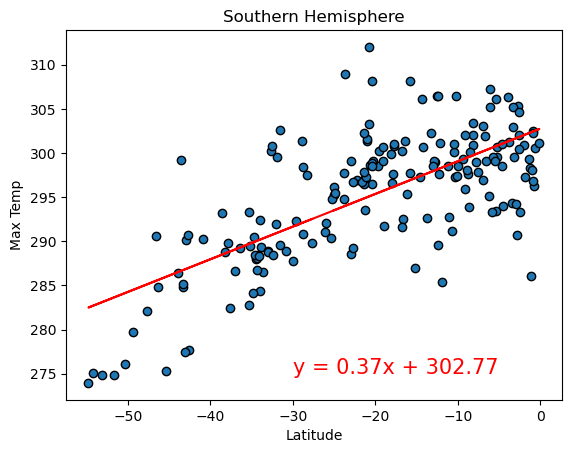

In [35]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Max Temp']

linear_function(x_values,y_values, 'Max Temp', (-30,275))



plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

**Discussion about the linear relationship:** The relationship is that both hemispheres end in the same range of temperature (300-310)

### Humidity vs. Latitude Linear Regression Plot

The r-squared is:0.072715752032781


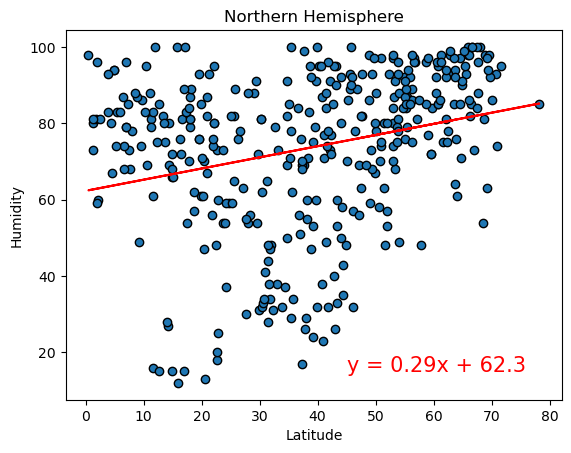

In [36]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Humidity']

linear_function(x_values,y_values, 'Max Temp', (45,15))

plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

The r-squared is:0.027615068230803775


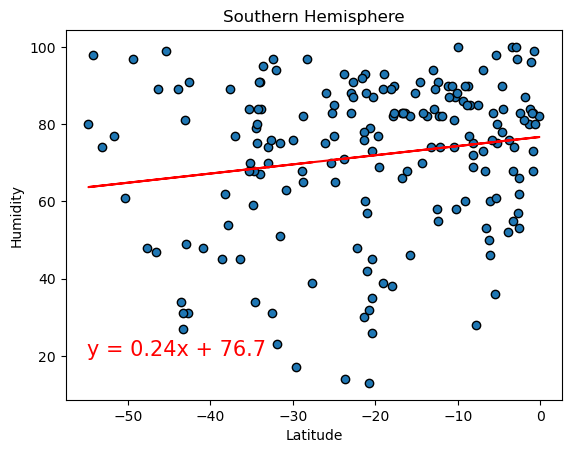

In [37]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Humidity']

linear_function(x_values,y_values, 'Max Temp', (-55,20))



plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

**Discussion about the linear relationship:** the relationship is that the humidity on both hemispheres tend to go up.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is:0.027547536473308314


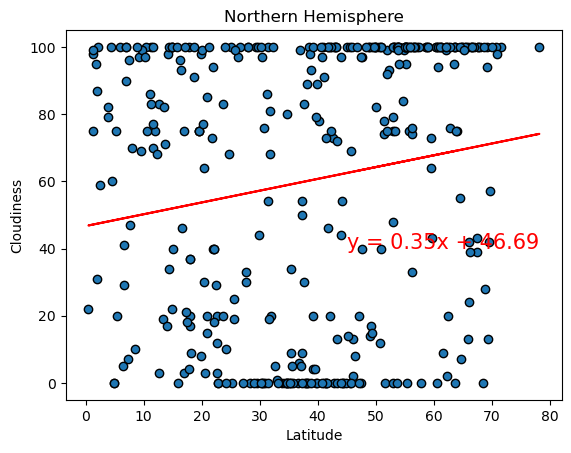

In [38]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Cloudiness']

linear_function(x_values,y_values, 'Max Temp', (45,40))


plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

The r-squared is:0.0005864066834735668


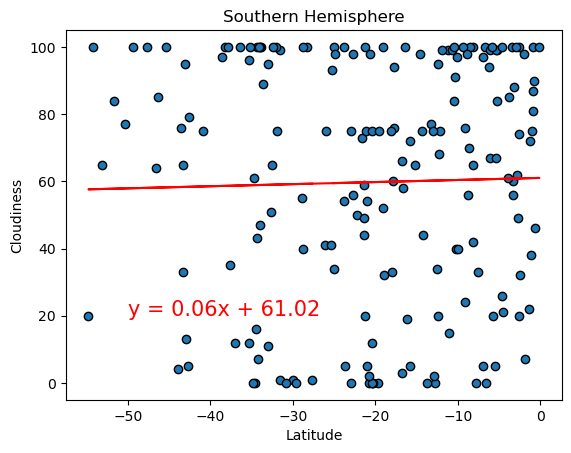

In [39]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Cloudiness']

linear_function(x_values,y_values, 'Max Temp', (-50,20))



plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

**Discussion about the linear relationship:** The cloudiness in th northen hemisphere will always be more dense.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is:0.006163907409925143


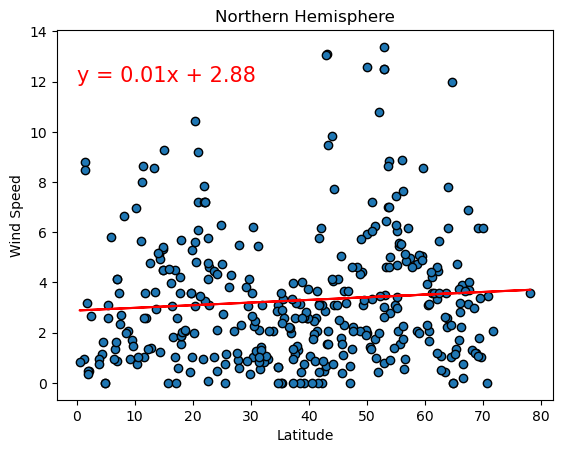

In [40]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Wind Speed']

linear_function(x_values,y_values, 'Max Temp', (0,12))



plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

The r-squared is:0.19512434823408836


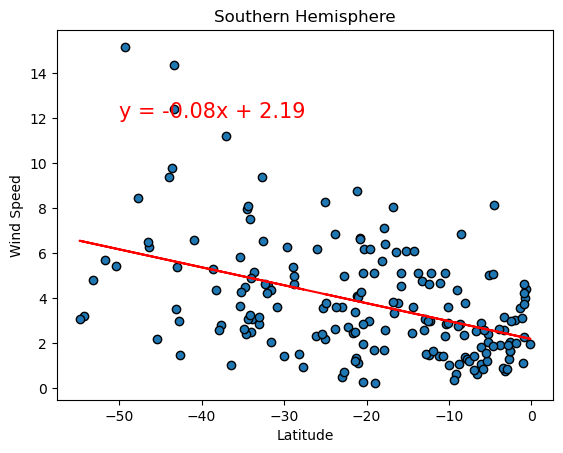

In [41]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Wind Speed']

linear_function(x_values,y_values, 'Max Temp', (-50,12))



plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()


**Discussion about the linear relationship:** The wind speeds in both hemispheres stay about the same speed.